# Air Compressor predictive maintenance using Machine Learning

We explore the use of machine learning to predict and maintain the performance of air compressor systems. Air compressors are essential devices that convert power into potential energy stored in compressed air, which can then be utilized for various applications such as powering pneumatic tools, inflating tires, and operating machinery. Ensuring air compressors’ optimal performance and longevity is crucial for many industries, and predictive maintenance can help identify potential failures and improve the maintenance process.

## Application type

We will predict the bearings status in the air compressor system, a binary variable (0 or 1). Therefore, this is a classification project.

The goal here is to model the bearings’ status based on the features of the air compressor system for its subsequent use in predictive maintenance.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import sklearn

## Dataset

The data file air_compressor_maintenance.csv contains the information for the air compressor example. This dataset consists of measurements taken from a compressor system supplying air to a factory production line, with 17 features collected in total. The dataset comprises 17 variables (columns) and 1000 instances (rows).

The features or variables included in the dataset are as follows:



* **RPM:** Indicates the number of rotations per minute for the motor.

* **Motor Power:** Measures the power consumption of the electric motor in kilowatts.

* **Torque:** Provides the torque produced by the motor in Newton-meter.

* **Outlet Pressure Bar:** Denotes the outlet pressure of compressed air in bars.

* **Air Flow:** Displays the flow rate of compressed air in cubic meters per minute.

* **Noise dB:** Represents the noise level of the compressor system in decibels.

* **Outlet Temp:** Shows the outlet temperature of the compressed air in degrees Celsius.

* **Water Pump Outlet Pressure:** Gives the outlet pressure of the water pump in bars.

* **Water Inlet Temp:** Specifies the inlet temperature of cooling water in degrees Celsius.

* **Water Outlet Temp:** Provides the outlet temperature of cooling water in degrees Celsius.

* **Water Pump Power:** Measures the power consumption of the water pump in kilowatts.

* **Water Flow:** Indicates the cooling water flow rate in cubic meters per minute.

* **Oil Pump Power:** This represents the power consumption of the oil pump in kilowatts.

* **Oil Tank Temp:** Shows the temperature of the oil tank in degrees Celsius.

* **Ground Acceleration:** Represents the acceleration experienced by the compressor at its mounting point, measured in the X, Y, and Z directions in meters per second squared.

* **Head Acceleration:** Refers to the acceleration value measured at the compressor head bolt or upper cooling fin in the X, Y, and Z directions, typically expressed in gravitational units.

* **Bearings Status:** Indicates the condition of the bearings in the motor and compressor system. The values can be ‘Ok’(value 0) for properly functioning bearings or ‘Noise’(value 1) for bearings that may need maintenance or replacement due to wear or damage affecting the performance and efficiency of the compressor.




In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Prafful-Vyas/Air-Compressor-predictive-maintenance-using-ML/main/aircompressor.csv')

### Data preparation

In [4]:
df.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,0,0,0,0,Stable
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,0,0,0,0,Stable
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,0,0,0,0,Stable
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,0,0,0,0,Stable
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,0,0,0,0,Stable


In [5]:
# List of columns to be dropped
columns_to_drop = ['id','wpump', 'radiator', 'exvalve','acmotor']

# Drop the columns
df.drop(columns_to_drop, axis=1, inplace=True)


In [6]:
# identify missing values
df.isnull().sum()

rpm                    0
motor_power            0
torque                 0
outlet_pressure_bar    0
air_flow               0
noise_db               0
outlet_temp            0
wpump_outlet_press     0
water_inlet_temp       0
water_outlet_temp      0
wpump_power            0
water_flow             0
oilpump_power          0
oil_tank_temp          0
gaccx                  0
gaccy                  0
gaccz                  0
haccx                  0
haccy                  0
haccz                  0
bearings               0
dtype: int64

In [7]:
# Adding timestamp of frequency = 1 minute to the dataset

import datetime

# Generate a time series with one-minute intervals
time_series = pd.date_range(start='00:00:00', end='16:39:00', freq='1min')

# Create a new DataFrame with timestamps
df['timestamp'] = time_series
df['timestamp'] = df['timestamp'].dt.time


# show the updated DataFrame
df.head()

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,oilpump_power,oil_tank_temp,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,timestamp
0,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,47.259238,...,300.372921,45.806178,0.711820,0.383773,2.649801,1.213344,1.409218,2.962484,0,00:00:00
1,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,55.025653,...,301.391605,45.825384,0.704667,0.450954,2.669423,1.210674,1.379050,2.938135,0,00:01:00
2,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,50.505622,...,300.973376,45.844730,0.704828,0.443924,2.772009,1.210612,1.373490,2.991878,0,00:02:00
3,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,58.706376,...,300.355630,45.817046,0.726604,0.370457,2.876056,1.213223,1.443234,3.096158,0,00:03:00
4,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,54.046362,...,300.440568,45.817640,0.707785,0.383868,2.849451,1.209216,1.405190,3.059417,0,00:04:00


In [8]:
# checking for no. of unique values in bearings
df.groupby(df['bearings']).size()

bearings
0    800
1    200
dtype: int64

In [9]:
df.dtypes

rpm                      int64
motor_power            float64
torque                 float64
outlet_pressure_bar    float64
air_flow               float64
noise_db               float64
outlet_temp            float64
wpump_outlet_press     float64
water_inlet_temp       float64
water_outlet_temp      float64
wpump_power            float64
water_flow             float64
oilpump_power          float64
oil_tank_temp          float64
gaccx                  float64
gaccy                  float64
gaccz                  float64
haccx                  float64
haccy                  float64
haccz                  float64
bearings                 int64
timestamp               object
dtype: object

In [10]:
def time_to_minutes(time_obj):
    return (time_obj.hour * 60) + time_obj.minute

df['time_minutes'] = df['timestamp'].apply(time_to_minutes).astype(float)

In [11]:
df.head()

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,oil_tank_temp,gaccx,gaccy,gaccz,haccx,haccy,haccz,bearings,timestamp,time_minutes
0,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,47.259238,...,45.806178,0.711820,0.383773,2.649801,1.213344,1.409218,2.962484,0,00:00:00,0.0
1,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,55.025653,...,45.825384,0.704667,0.450954,2.669423,1.210674,1.379050,2.938135,0,00:01:00,1.0
2,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,50.505622,...,45.844730,0.704828,0.443924,2.772009,1.210612,1.373490,2.991878,0,00:02:00,2.0
3,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,58.706376,...,45.817046,0.726604,0.370457,2.876056,1.213223,1.443234,3.096158,0,00:03:00,3.0
4,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,54.046362,...,45.817640,0.707785,0.383868,2.849451,1.209216,1.405190,3.059417,0,00:04:00,4.0


### Data Exploration

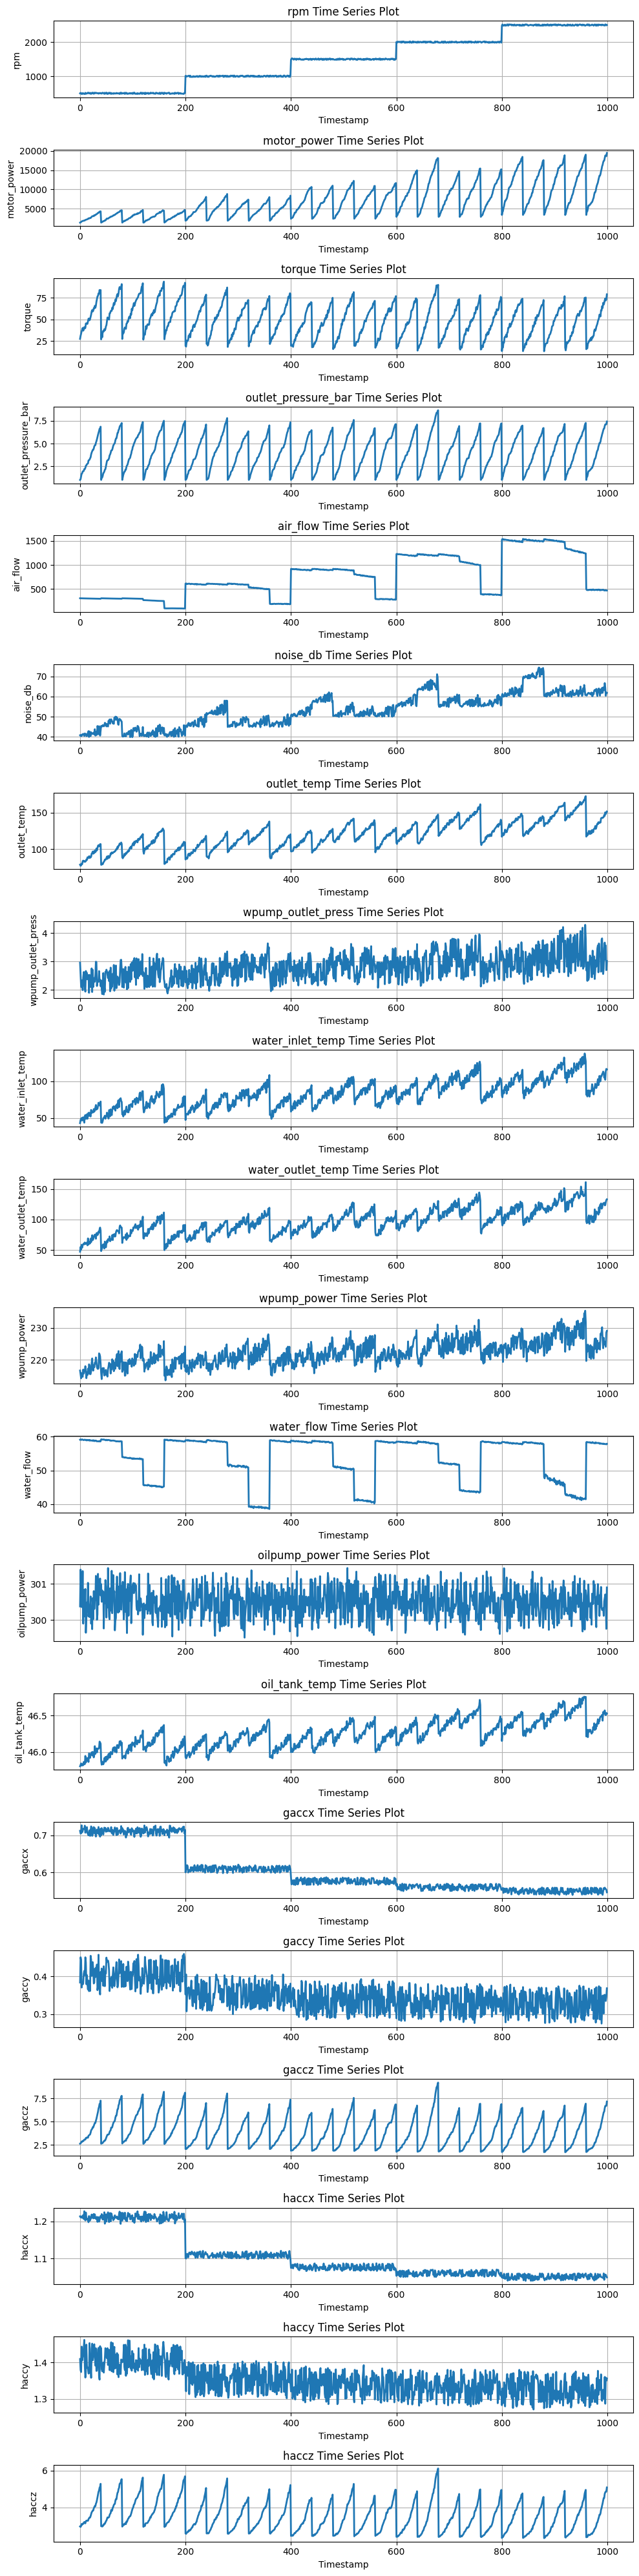

In [12]:
# List of 20 column names to plot
columns_to_plot = df.columns[:20]

# Create a figure and 20 subplots
fig, axs = plt.subplots(20, 1, figsize=(10, 40))

# Iterate over the columns and plot each time series
for i, col in enumerate(columns_to_plot):
    axs[i].plot(df.index, df[col], linewidth=2)
    axs[i].set_title(f'{col} Time Series Plot')
    axs[i].set_xlabel('Timestamp')
    axs[i].set_ylabel(f'{col}')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


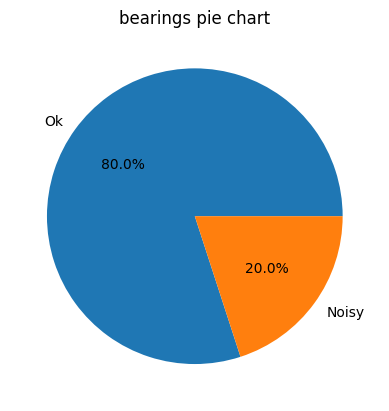

In [13]:
fig, ax = plt.subplots()
labels = 'Ok', 'Noisy'

ax.pie(df.groupby('bearings').size(),labels=labels, autopct='%1.1f%%')
ax.set_title('bearings pie chart')
plt.show()


**Note:** Imbalanced Dataset

### Train Test Split

In [14]:
import sklearn

from sklearn.model_selection import train_test_split
X, y = df.iloc[:,0:20].values, df.iloc[:,-3].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)

### Standardization

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Principal Component Analysis

In [16]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)


Eigenvalues 
 [9.80374937e+00 4.98121839e+00 1.43755351e+00 9.99091592e-01
 6.43175289e-01 6.10357861e-01 4.88037898e-01 3.05361922e-01
 2.30333753e-01 1.78271435e-01 1.02322243e-01 9.17528502e-02
 4.51574820e-02 3.71015881e-02 3.48879482e-02 1.79832586e-02
 9.45729912e-03 1.00000938e-02 2.79571812e-03 2.81142872e-06]


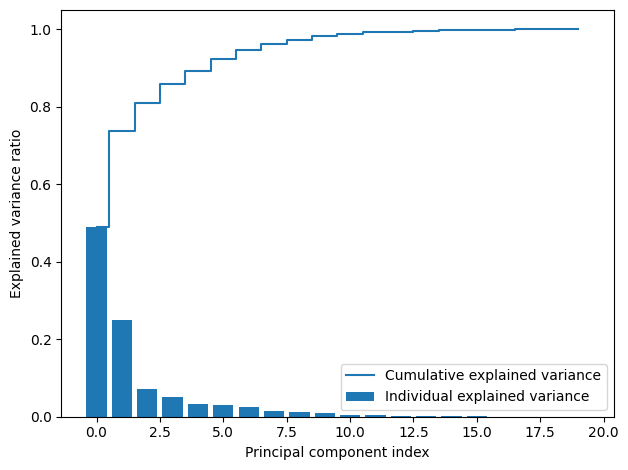

In [17]:
# variance explained ratios
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(0,20), var_exp, align='center',
        label='Individual explained variance')

plt.step(range(0,20), cum_var_exp, where='mid',
         label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

First two principal components explain almost 80% of the variance

In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
                for i in range(len(eigen_vals))]

# sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [19]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

Matrix W:
 [[ 0.283677    0.16020503]
 [ 0.2682694  -0.1695857 ]
 [ 0.02365577 -0.43964721]
 [ 0.10058431 -0.41256676]
 [ 0.24039993  0.15713152]
 [ 0.26862044  0.10509479]
 [ 0.30332413 -0.09070131]
 [ 0.19859076 -0.07315549]
 [ 0.2999123  -0.08962555]
 [ 0.29843151 -0.08872808]
 [ 0.27112269 -0.0921965 ]
 [-0.09399512  0.01005909]
 [-0.0195826   0.02042695]
 [ 0.30034041 -0.09199941]
 [-0.26722188 -0.1895304 ]
 [-0.19702187 -0.15640544]
 [ 0.03880195 -0.43473059]
 [-0.26650931 -0.18763302]
 [-0.20082893 -0.14996399]
 [ 0.02144326 -0.43852245]]


In [20]:
X_train_std[0].dot(w)

array([ 0.80685128, -1.38824518])

In [21]:
X_train_pca = X_train_std.dot(w)

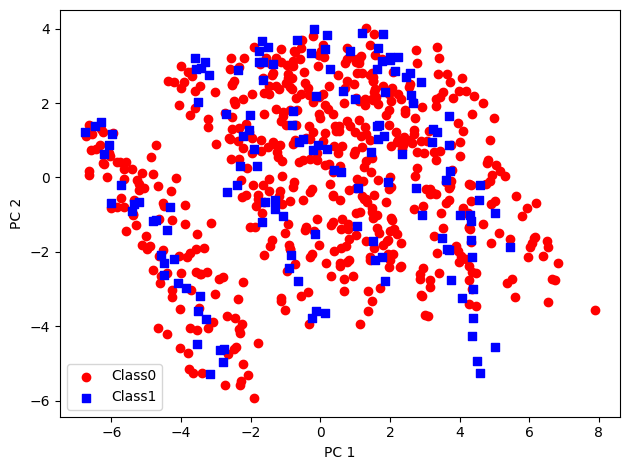

In [22]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=f'Class{l}', marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.decomposition import PCA

# initializing the PCA transformer
pca = PCA(n_components=2)

# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [24]:
def get_most_contributing_features(loading_vectors, feature_names, n_top_features=5):
    """
    Finds the most contributing features for each principal component.

    Args:
        loading_vectors (np.ndarray): The loading vectors from PCA.
        feature_names (list): List of feature names.
        n_top_features (int): Number of top contributing features to return.

    Returns:
        dict: A dictionary where keys are principal component indices and values are
              lists of tuples (feature_name, contribution).
    """
    top_features = {}
    for i, component in enumerate(loading_vectors):
        feature_contributions = [(abs(component[j]), feature_names[j]) for j in range(len(component))]
        feature_contributions.sort(reverse=True)  # Sort by absolute contribution
        top_features[f'PC{i+1}'] = [(name, contribution) for contribution, name in feature_contributions[:n_top_features]]
    return top_features

# Assuming 'feature_names' is a list of your feature names
top_features = get_most_contributing_features(eigen_vecs, feature_names=df.columns[:20].tolist())

# Print the top contributing features
for pc, features in top_features.items():
    print(f"{pc}:")
    for feature, contribution in features:
        print(f"  {feature}: {contribution:.4f}")

PC1:
  gaccy: 0.5791
  gaccz: 0.5386
  oilpump_power: 0.3058
  rpm: 0.2837
  water_outlet_temp: 0.2380
PC2:
  water_flow: 0.6949
  wpump_power: 0.5275
  rpm: 0.2683
  torque: 0.2122
  wpump_outlet_press: 0.1701
PC3:
  haccy: 0.6698
  oilpump_power: 0.4729
  motor_power: 0.4396
  gaccy: 0.2456
  gaccz: 0.2003
PC4:
  haccy: 0.7259
  motor_power: 0.4126
  oilpump_power: 0.4066
  gaccy: 0.2075
  water_outlet_temp: 0.1498
PC5:
  wpump_outlet_press: 0.7437
  air_flow: 0.3994
  water_outlet_temp: 0.3087
  rpm: 0.2404
  wpump_power: 0.2312
PC6:
  wpump_power: 0.7395
  water_flow: 0.3568
  air_flow: 0.2926
  rpm: 0.2686
  torque: 0.2684
PC7:
  gaccz: 0.7427
  gaccy: 0.4583
  rpm: 0.3033
  water_outlet_temp: 0.1577
  water_flow: 0.1525
PC8:
  noise_db: 0.8092
  outlet_temp: 0.4362
  air_flow: 0.2729
  rpm: 0.1986
  torque: 0.1768
PC9:
  oil_tank_temp: 0.8511
  rpm: 0.2999
  gaccy: 0.2131
  water_flow: 0.1923
  water_outlet_temp: 0.1857
PC10:
  gaccx: 0.6984
  oil_tank_temp: 0.3979
  water_flow: 

### Checking Data Imbalance

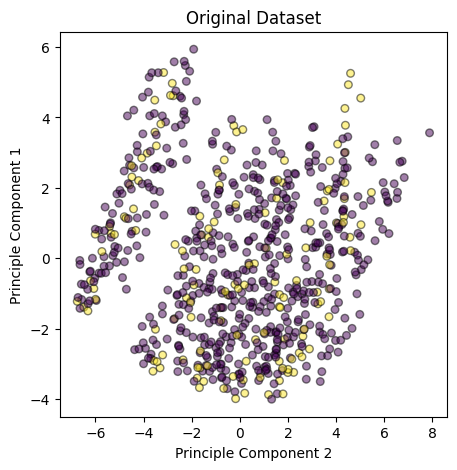

In [25]:
# Function for plotting dataset
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

# Plot dataset
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_pca, y_train, ax, title='Original Dataset')

 #### SMOT-TOMEK: Oversample with SMOTE, then Undersample with Tomek Links



 **SMOTE-TOMEK** is a technique that combines oversampling (SMOTE) with undersampling (with Tomek Links)

In [26]:
from imblearn.combine import SMOTETomek
from sklearn.svm import LinearSVC

# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_pca, y_train)

### Neural network

In [27]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import SGD

X_train_pca_torch = torch.from_numpy(X_train_pca).float()
y_train_torch = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_pca_torch, y_train_torch)

X_train_smote_torch = torch.from_numpy(X_train_smotetomek).float()
y_train_smote_torch = torch.from_numpy(y_train_smotetomek)
train_ds2 = TensorDataset(X_train_smote_torch, y_train_smote_torch)

torch.manual_seed(1)
batch_size = 2

train_dl = DataLoader(train_ds, batch_size, shuffle=True)
train_dl2 = DataLoader(train_ds2, batch_size, shuffle=True)

In [28]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x

In [29]:
def create_model(X_train,dl):
  input_size = X_train.shape[1]
  hidden_size = 16
  output_size = 2
  model = Model(input_size, hidden_size, output_size)

  learning_rate = 0.001
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  num_epochs = 100
  loss_hist = [0] * num_epochs
  accuracy_hist = [0] * num_epochs

  for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
      pred = model(x_batch)
      y_batch = y_batch.long()
      loss = loss_fn(pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      loss_hist[epoch] = loss.item() * y_batch.size(0)
      is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
      accuracy_hist[epoch] += is_correct.mean()
    loss_hist[epoch] /= len(dl.dataset)
    accuracy_hist[epoch] /= len(dl.dataset)

  return [model, loss_hist, accuracy_hist]



In [30]:
def create_model_plots(model_list):
  fig = plt.figure(figsize=(18,5))
  ax = fig.add_subplot(1,2,1)
  ax.plot(model_list[1], lw=3)
  ax.set_title('Training loss', size=15)
  ax.set_xlabel('Epoch', size=15)
  ax.tick_params(axis='both',labelsize=15)
  ax = fig.add_subplot(1,2,2)
  ax.plot(model_list[2], lw=3)
  ax.set_title('Training accuracy', size=15)
  ax.set_xlabel('Epoch', size=15)
  ax.tick_params(axis='both',which='major',labelsize=15)
  plt.show()

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

def plot_roc_curve(y_true, y_scores, label=None):
    """
    Plots the Receiver Operating Characteristic (ROC) curve.

    Args:
        y_true (array-like): True binary labels.
        y_scores (array-like): Predicted probabilities or decision function scores.
        label (str, optional): Label for the ROC curve. Defaults to None.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})' if label else f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [32]:
# evaluating the trained model on the test dataset
def evaluate_model(model, X_test, y_test):
  X_test_norm = torch.from_numpy(X_test).float()
  pred_test = model(X_test_norm)

  plot_roc_curve(y_test, torch.argmax(pred_test, dim=1))

  correct = (torch.argmax(pred_test, dim=1) == y_test).float()
  accuracy = correct.mean()
  print(f'Test Accuracy: {accuracy: 4f}')

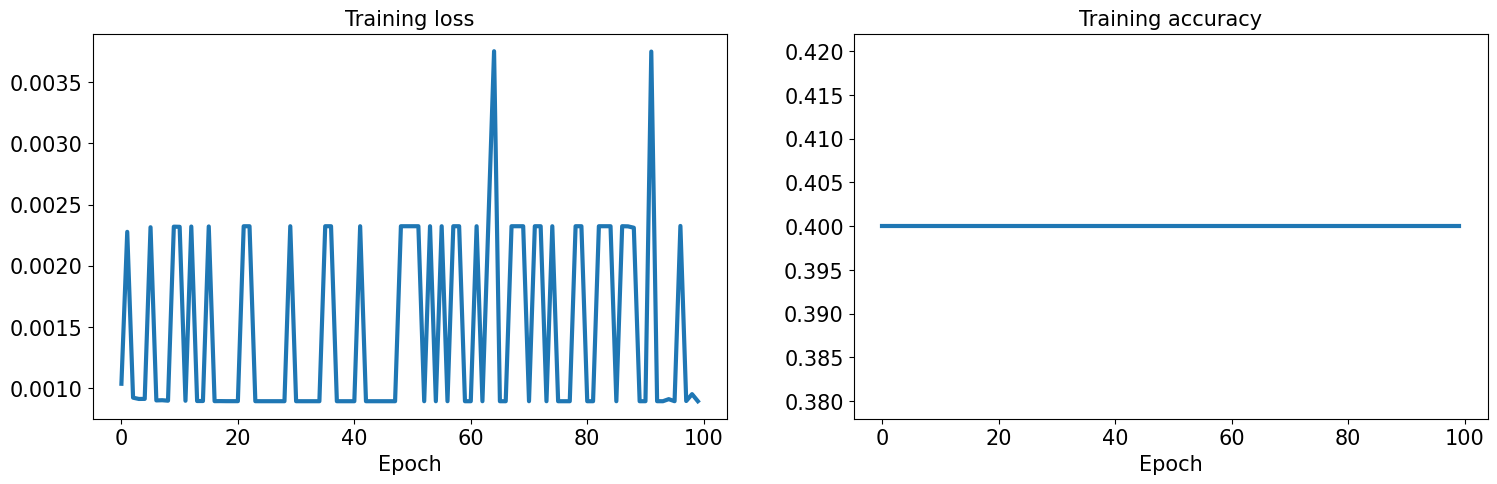

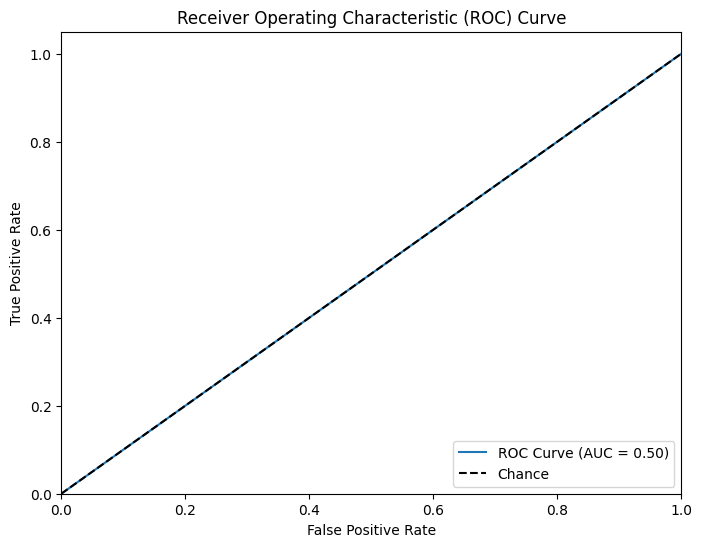

Test Accuracy:  0.800000


In [33]:
# model with original dataset
model1 = create_model(X_train_pca_torch, train_dl)
create_model_plots(model1)
evaluate_model(model1[0], X_test_pca, y_test)

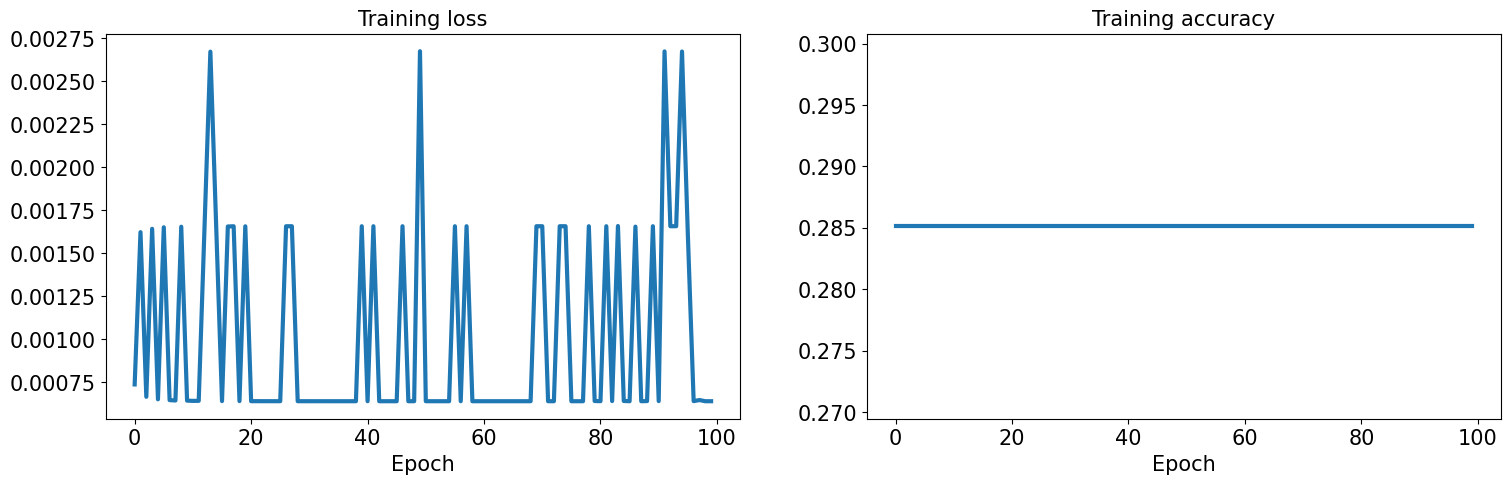

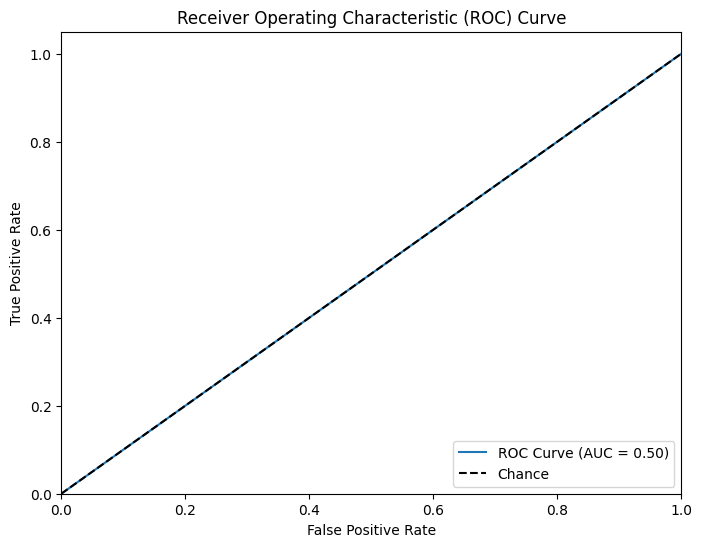

Test Accuracy:  0.800000


In [34]:
# model with SMOTE-TOMEK sampling
model2 = create_model(X_train_smote_torch, train_dl2)
create_model_plots(model2)
evaluate_model(model2[0], X_test_pca, y_test)

Both models result in same test accuracy and ROC curve

## Next Steps
Explore time series models (RNNs, LSTM), understand about time series charts and what they explain.